<a href="https://colab.research.google.com/github/akansha765/Lendingclubcasestudy/blob/main/Akansha_Sanjay_Yatta.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dataset Shape: (39717, 111)

Column Names:
 Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq',
       'percent_bc_gt_75', 'pub_rec_bankruptcies', 'tax_liens',
       'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit',
       'total_il_high_credit_limit'],
      dtype='object', length=111)

Sample Data:
         id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0  1077501    1296599       5000         5000           4975.0   36 months   
1  1077430    1314167       2500         2500           2500.0   60 months   
2  1077175    1313524       2400         2400           2400.0   36 months   
3  1076863    1277178      10000        10000          10000.0   36 months   
4  1075358    1311748       3000         3000           3000.0   60 months   

  int_rate  installment grade sub_grade  ... num_tl_90

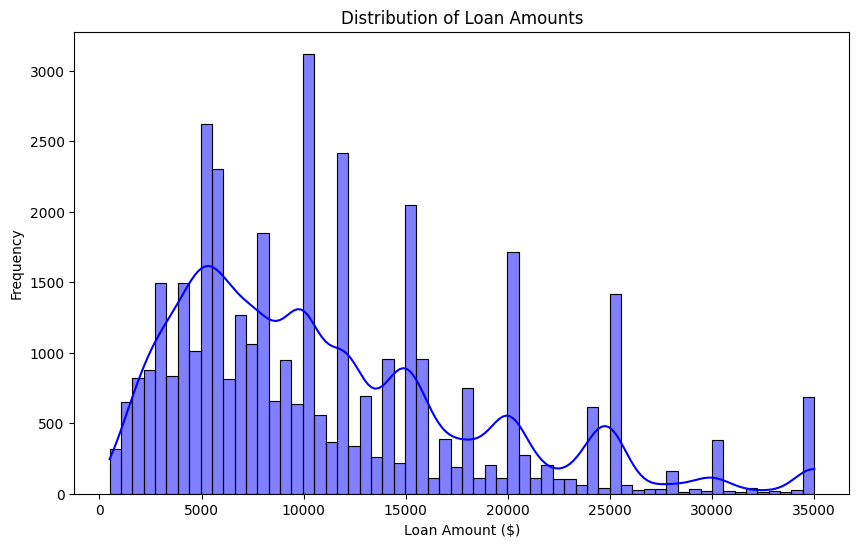

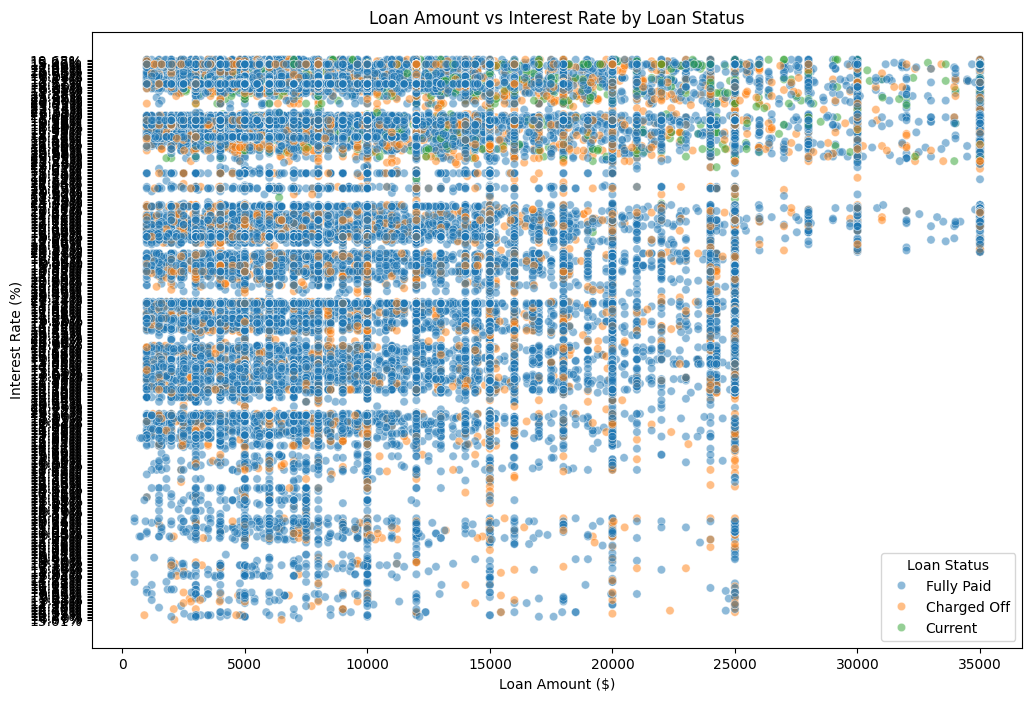

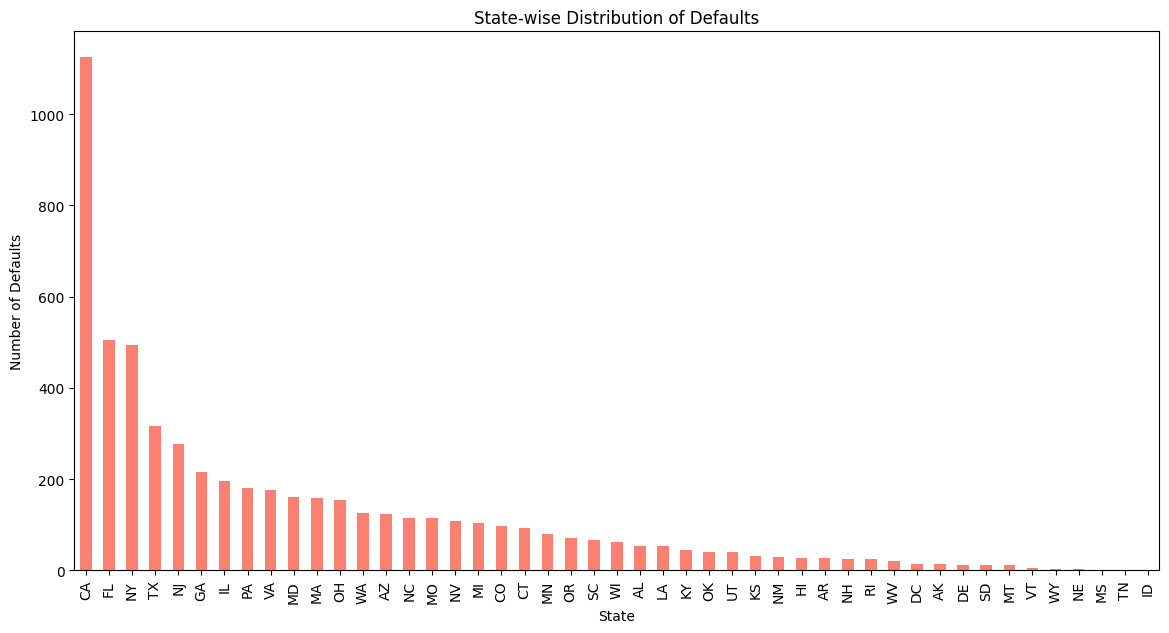

EDA completed. Visualized loan trends, default patterns, and key insights.


In [4]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the loan dataset and data dictionary
loan_data_path = '/content/loan.zip'
data_dictionary_path = '/content/Data_Dictionary.xlsx'

# Reading the loan dataset
loan_data = pd.read_csv(loan_data_path, compression='zip', low_memory=False)

# Displaying a summary of the dataset
print("Dataset Shape:", loan_data.shape)
print("\nColumn Names:\n", loan_data.columns)
print("\nSample Data:\n", loan_data.head())

# Reading the data dictionary
data_dict = pd.read_excel(data_dictionary_path)
print("\nData Dictionary:\n", data_dict.head())

# Initial data cleaning
# Dropping columns with too many missing values or irrelevant ones
missing_data = loan_data.isnull().sum() / len(loan_data) * 100
high_missing_cols = missing_data[missing_data > 50].index
loan_data_cleaned = loan_data.drop(columns=high_missing_cols)

print("\nDropped Columns with >50% Missing Values:\n", high_missing_cols)
print("\nCleaned Dataset Shape:", loan_data_cleaned.shape)

# Identifying charged-off loans (defaulters)
defaults = loan_data_cleaned[loan_data_cleaned['loan_status'] == 'Charged Off']
print("\nDefault Count:", len(defaults))

# Exploratory Data Analysis (EDA)
# Univariate Analysis: Distribution of Loan Amounts
plt.figure(figsize=(10, 6))
sns.histplot(loan_data_cleaned['loan_amnt'], kde=True, color='blue')
plt.title('Distribution of Loan Amounts')
plt.xlabel('Loan Amount ($)')
plt.ylabel('Frequency')
plt.show()

# Multivariate Analysis: Loan Amount vs Interest Rate by Loan Status
plt.figure(figsize=(12, 8))
sns.scatterplot(data=loan_data_cleaned, x='loan_amnt', y='int_rate', hue='loan_status', alpha=0.5)
plt.title('Loan Amount vs Interest Rate by Loan Status')
plt.xlabel('Loan Amount ($)')
plt.ylabel('Interest Rate (%)')
plt.legend(title='Loan Status')
plt.show()

# Further EDA - Demographics
# Example: State-wise Distribution of Defaults
state_defaults = defaults['addr_state'].value_counts()
plt.figure(figsize=(14, 7))
state_defaults.plot(kind='bar', color='salmon')
plt.title('State-wise Distribution of Defaults')
plt.xlabel('State')
plt.ylabel('Number of Defaults')
plt.show()

# Conclusion
print("EDA completed. Visualized loan trends, default patterns, and key insights.")
